In [1]:
#first, import everything but the kitchen sink
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True # Comment this line if no LaTeX installation is available
matplotlib.rcParams['font.family'] = 'serif' # Comment this line if no LaTeX installation is available
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'
import matplotlib.pyplot as plt
import sys
import os
import torch; torch.set_default_dtype(torch.float64)
import math
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, 'C:\\Users\\vascodebruijn\\Documents\\GitHub\\graph-neural-networks')

if module_path not in sys.path:
    sys.path.append(module_path+"\\Python")
import utils
import import_traces
import graph_generation as gg

#Some variables
K= np.array([1,2,3,4,5])
L =np.array( [1,2,3,4])
F = np.array([1,2,4,8,16,32,64,128])

Faxis = (1,2)
Laxis = (0,2)
Kaxis = (0,1)
    
#make plotting a bit more easier
def plot_traces(data, title,labels,description=''):
    if len(data) > 1:
        data = np.transpose(data)
    fig = plt.figure()
    axes = plt.gca()
    axes.set_ylim([0,255])

    plt.plot(data)   
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    plt.legend(labels)
    plt.figtext(.01, .01,description)
    

def plot_means(data,ax,values,param,title):
    fig = plt.figure()
    plt.plot(np.transpose(np.nanmean(data,axis=ax)))    
    fig.suptitle(title)
    plt.ylabel(r'Guessing Entropy')
    plt.xlabel(r'Number of Traces')
    axes = plt.gca()
    axes.set_ylim([0,255])
    labels = []
    for val in values:
        label = param +"="+str(val)
        labels.append(label)
    plt.legend(labels)
    
#showtime
all_data = utils.get_all_results()

###Helper Plot functions 

def plot_grid_hp_tuning(datapath, plot_title):
    data= all_data[datapath]
    data_flt = data['res']
    data_reshape = utils.reshape_results(data_flt,len(F),len(L),len(K),efn=1)
    data_mean = np.nanmean(data_flt, axis=1)
    best_ids = np.argsort(data_mean)[0:10]
    ids_unraveled = np.unravel_index(best_ids, (len(F),len(L),len(K)))
    plot_traces(data_flt[best_ids], plot_title,[])
    best_hp_list = np.array(data['hyperparam'])[best_ids.astype(int)].tolist()
    return best_hp_list


def plot_grid_hp_tuning_1d(datapath, plot_title):
    data= all_data[datapath]
    data_flt = data['res']
    data_reshape = utils.reshape_results(data_flt,1,1,5,efn=5)
    data_mean = np.nanmean(data_flt, axis=1)
    best_ids = np.argsort(data_mean)[0:10]
    ids_unraveled = np.unravel_index(best_ids, (len(F),len(L),len(K)))
    plot_traces(data_flt[best_ids], plot_title)
    best_hp_list = np.array(data['hyperparam'])[best_ids.astype(int)].tolist()
    return best_hp_list


def cross_eval_hptuning(datapath, plot_title):
    data = all_data[datapath]
    CE_data = data['res']
    (n, m) = CE_data.shape
    N = math.floor(n/10)
    CE_data = CE_data[0:(N*10),:]
    CE_hyperparam = data['hyperparam']
    CE_srt = np.reshape(CE_data,(N,10,m))
    CE_mean = np.mean(CE_srt, axis = 1 )
    plot_traces(CE_mean, plot_title,[])
    
    
def perf_test(datapath, plot_title):
    data = all_data[datapath]
    perf_data = data['res']
    plot_traces(perf_data,plot_title,[])
    plot_traces(np.mean(perf_data,axis=0),plot_title+'(MEAN)',[])

def ablation_study(datapath, plot_title):
    data = all_data[datapath]['res']
    (n,m) = data.shape
    srt_data = np.reshape(data,(4,10,m))
    data_mean = np.mean(srt_data, axis = 1 )
    plot_traces(data_mean, plot_title,labels=['Baseline','Cyclic','Fully Connected','Random Graph'])
    
    
    

9935.7 & 195.9 &9348.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0
10001.0 & 0.0 &10001.0 & 10001.0


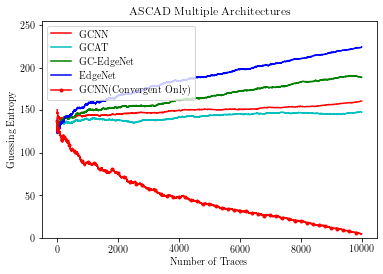

In [2]:
#ASCAD Baseline dataset
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
gcnn_data = np.append(all_data['experiments\\20210118\\ascad_gcnn']['res'],all_data['experiments\\20210202\\ascad_gcnn_1']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_2']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_3']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210202\\ascad_gcnn_4']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-1']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-2']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-3']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-4']['res'], axis=0)
gcnn_data = np.append(gcnn_data,all_data['experiments\\20210203\\ascad_gcnn-5']['res'], axis=0)

gcat_data = np.append(all_data['experiments\\20210119\\ascad_gcat_10k']['res'],all_data['experiments\\20210210\\ascad_gcat']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210210\\ascad_gcat-1']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210212\\ascad_gcat-1']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210212\\ascad_gcat']['res'],axis=0)
gcat_data = np.append(gcat_data,all_data['experiments\\20210211\\ascad_gcat']['res'],axis=0)

gcedgenet_data = np.append(all_data['experiments\\20210119\\ascad_gcedgenet_10k']['res'],all_data['experiments\\20210208\\ascad_gcedgenet']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210212\\ascad_gcedgenet']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210212\\ascad_gcedgenet-1']['res'], axis=0)
gcedgenet_data = np.append(gcedgenet_data,all_data['experiments\\20210211\\ascad_gcedgenet']['res'], axis=0)

edgenet_data = np.append(all_data['experiments\\20210119\\ascad_edgenet_10k']['res'],all_data['experiments\\20210211\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210211\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210212\\ascad_edgenet']['res'],axis=0)
edgenet_data = np.append(edgenet_data,all_data['experiments\\20210212\\ascad_edgenet-1']['res'],axis=0)

(gcnn_conv,p) = utils.filter_traces(gcnn_data,10)
#plt.plot(np.transpose(gcnn_data[0,:])) #10k
plt.plot(np.transpose(np.mean(gcnn_data,axis=0)),color='r') #10k

plt.plot(np.transpose(np.mean(gcat_data,axis=0)),color='c') #10k
plt.plot(np.transpose(np.mean(gcedgenet_data,axis=0)),color='g') #10k
plt.plot(np.transpose(np.mean(edgenet_data,axis=0)),color='b') #10k
plt.plot(np.transpose(np.mean(gcnn_conv,axis=0)),color='r',marker='.',markevery=200) #10k

labels = ['GCNN','GCAT', 'GC-EdgeNet','EdgeNet', 'GCNN(Convergent Only)']
plt.legend(labels)
plt.title('ASCAD Multiple Architectures')
plt.savefig("ASCAD_baseline_CV.pdf")

###only plot gcnn
utils.get_traces_t_print(gcnn_data,threshold=10)
utils.get_traces_t_print(gcat_data,threshold=10)
utils.get_traces_t_print(gcedgenet_data,threshold=10)
utils.get_traces_t_print(edgenet_data,threshold=10)


10.0
45.45454545454545
9348.0 & 0.0 &9348.0 & 9348.0
1599.0 & 2294.283068847434 &242.0 & 6157.0


{'whiskers': [<matplotlib.lines.Line2D at 0x153727b0c70>,
 'caps': [<matplotlib.lines.Line2D at 0x153727bc370>,
 'boxes': [<matplotlib.lines.Line2D at 0x153727b0910>],
 'medians': [<matplotlib.lines.Line2D at 0x153727bca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x153727bcd90>],
 'means': []}

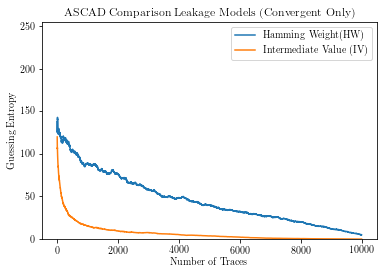

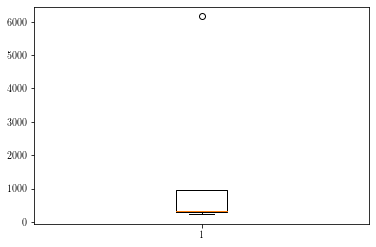

In [3]:
ascad_gcnn_IV = np.append(all_data['experiments\\20210119\\ascad_gcnn_IV']['res'],all_data['experiments\\20210202\\ascad_gcnn_IV_1']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_2']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_3']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210202\\ascad_gcnn_IV_4']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-1']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-2']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-3']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-4']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210203\\ascad_gcnn_IV-5']['res'], axis=0 )
ascad_gcnn_IV = np.append(ascad_gcnn_IV,all_data['experiments\\20210204\\ascad_gcnn_IV']['res'], axis=0 )
(gcnn_IV_conv,p_IV) = utils.filter_traces(ascad_gcnn_IV,10)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')

labels = ['Hamming Weight(HW)', 'Intermediate Value (IV)']
plt.plot(np.transpose(np.mean(gcnn_conv,axis=0))) #10k
plt.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0))) #Identity

plt.legend(labels)
plt.title('ASCAD Comparison Leakage Models (Convergent Only)')
plt.savefig("ASCAD_lm_CV.pdf")

print (p)
print (p_IV)


utils.get_traces_t_print(gcnn_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_conv,threshold=10)

fig = plt.figure()

plt.boxplot(utils.get_traces_threshold(gcnn_IV_conv,10,stats=False))

45.45454545454545
25.0
0.0
100.0
9.090909090909092
1599.0 & 2294.283068847434 &242.0 & 6157.0
4843.666666666667 & 1798.152817631348 &2369.0 & 6588.0
993.4 & 301.56200025865326 &594.0 & 1646.0
1708.0 & 0.0 &1708.0 & 1708.0


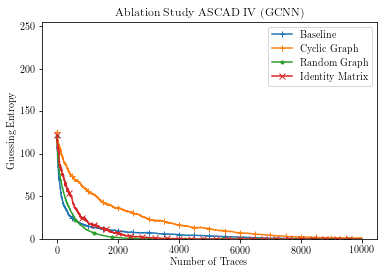

<Figure size 432x288 with 0 Axes>

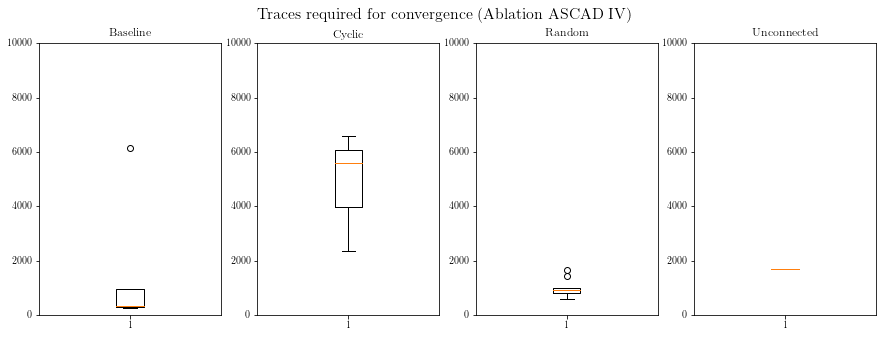

In [4]:
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')

ascad_IV_rnd = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_rnd']['res'],all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_1']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_2']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_3']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210202\\ascad_gcnn_IV_rnd_4']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-1']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-2']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-3']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210203\\ascad_gcnn_IV_rnd-4']['res'], axis=0) 
ascad_IV_rnd = np.append(ascad_IV_rnd,all_data['experiments\\20210204\\ascad_gcnn_IV_rnd']['res'], axis=0) 

(gcnn_IV_rnd_conv,p_IV_rnd) = utils.filter_traces(ascad_IV_rnd,10)



ascad_IV_fc = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_fc']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-2']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-3']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-4']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210205\\ascad_gcnn_IV_fc-5']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-2']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210206\\ascad_gcnn_IV_fc-3']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc-1']['res'], axis=0) 
ascad_IV_fc = np.append(ascad_IV_fc,all_data['experiments\\20210208\\ascad_gcnn_IV_fc-2']['res'], axis=0) 

(gcnn_IV_fc_conv,p_IV_fc) = utils.filter_traces(ascad_IV_fc,10)


ascad_IV_id = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_ID']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_ID-1']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-2']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-3']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-4']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210205\\ascad_gcnn_IV_ID-5']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-1']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-2']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-3']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210206\\ascad_gcnn_IV_ID-4']['res'], axis=0) 
ascad_IV_id = np.append(ascad_IV_id,all_data['experiments\\20210208\\ascad_gcnn_IV_ID']['res'], axis=0) 

(gcnn_IV_id_conv,p_IV_id) = utils.filter_traces(ascad_IV_id,10)


ascad_IV_line = np.append(all_data['experiments\\20210122\\ascad_gcnn_IV_line']['res'],all_data['experiments\\20210205\\ascad_gcnn_IV_line-1']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-2']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-3']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-4']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210205\\ascad_gcnn_IV_line-5']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-2']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-3']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-4']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210206\\ascad_gcnn_IV_line-5']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210208\\ascad_gcnn_IV_line']['res'], axis=0) 
ascad_IV_line = np.append(ascad_IV_line,all_data['experiments\\20210208\\ascad_gcnn_IV_line-1']['res'], axis=0) 
(gcnn_IV_line_conv,p_IV_line) = utils.filter_traces(ascad_IV_line,10)




#plt.plot(np.transpose(all_data['experiments\\20210119\\ascad_gcnn_IV']['res']),marker='+',markevery=500) #Baseline
plt.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)),marker='+',markevery=500) #IV
plt.plot(np.transpose(np.mean(gcnn_IV_line_conv,axis=0)),marker='+',markevery=500) #Cyclic Graph
#plt.plot(np.transpose(np.mean(ascad_IV_fc,axis=0)),marker='.',markevery=600) #Fully Connected
plt.plot(np.transpose(np.mean(gcnn_IV_rnd_conv,axis=0)),marker='.',markevery=600) #Random
plt.plot(np.transpose(np.mean(gcnn_IV_id_conv,axis=0)),marker='x',markevery=400) #Identity

print (p_IV)
print (p_IV_line)
print (p_IV_fc)
print (p_IV_rnd)
print (p_IV_id)

labels = ['Baseline','Cyclic Graph','Random Graph','Identity Matrix', 'Intermediate Value']
plt.legend(labels)
plt.title('Ablation Study ASCAD IV (GCNN)')
plt.savefig("ASCAD_ablation_IV_CV.pdf")
utils.get_traces_t_print(gcnn_IV_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_line_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_rnd_conv,threshold=10)
utils.get_traces_t_print(gcnn_IV_id_conv,threshold=10)

fig = plt.figure()
fig, axs = plt.subplots(1, 4,figsize=(15,5))
axs[0].set_ylim([0,10000])
axs[1].set_ylim([0,10000])
axs[2].set_ylim([0,10000])
axs[3].set_ylim([0,10000])

fig.suptitle('Traces required for convergence (Ablation ASCAD IV)', fontsize=16)
axs[0].set_title('Baseline')
axs[1].set_title('Cyclic')
axs[2].set_title('Random')
axs[3].set_title('Unconnected')

axs[0].boxplot(utils.get_traces_threshold(gcnn_IV_conv,10,stats=False))
axs[1].boxplot(utils.get_traces_threshold(gcnn_IV_line_conv,10,stats=False))
axs[2].boxplot(utils.get_traces_threshold(gcnn_IV_rnd_conv,10,stats=False))
axs[3].boxplot(utils.get_traces_threshold(gcnn_IV_id_conv,10,stats=False))
plt.savefig("ASCAD_ablation_IV_CV_Boxplot.pdf")


54.54545454545454
2785.6666666666665 & 1924.6815898278403 &1381.0 & 7019.0


{'whiskers': [<matplotlib.lines.Line2D at 0x15372a43df0>,
 'caps': [<matplotlib.lines.Line2D at 0x15372a504f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15372a43a90>],
 'medians': [<matplotlib.lines.Line2D at 0x15372a50bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15372a50f10>],
 'means': []}

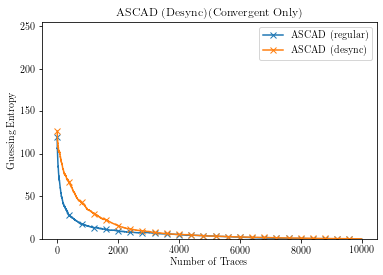

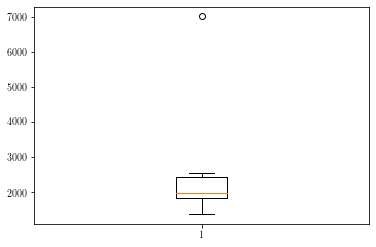

In [5]:
fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD (Desync)(Convergent Only) ')
ascad_desync_IV = np.append(all_data['experiments\\20210124\\ascad_desync_IV_gcnn']['res'],all_data['experiments\\20210202\\ascad_desync_IV_gcnn_1']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_2']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_3']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210202\\ascad_desync_IV_gcnn_4']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-1']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-2']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-3']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210203\\ascad_desync_IV_gcnn-4']['res'],axis=0)
ascad_desync_IV = np.append(ascad_desync_IV,all_data['experiments\\20210204\\ascad_desync_IV_gcnn']['res'],axis=0)
(desync_conv,p_desync) = utils.filter_traces(ascad_desync_IV,10)

plt.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)),marker='x',markevery=400) #Identity
plt.plot(np.transpose(np.mean(desync_conv,axis=0)),marker='x',markevery=400) #Identity
plt.legend(['ASCAD (regular)','ASCAD (desync)'])
plt.savefig("ASCAD_desync_CV.pdf")

print(p_desync)
utils.get_traces_t_print(desync_conv,threshold=10)
fig = plt.figure()
plt.boxplot(utils.get_traces_threshold(desync_conv,10,stats=False))

57.14285714285714
42.857142857142854
42.857142857142854
57.14285714285714
5411.5 & 490.5173289497528 &4783.0 & 6029.0
6247.666666666667 & 865.2465287740573 &5031.0 & 6969.0
1420.3333333333333 & 399.4841117686103 &1095.0 & 1983.0
904.75 & 335.20693235671604 &540.0 & 1356.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1537288c8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1537288c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1537288cf10>],
 'medians': [<matplotlib.lines.Line2D at 0x153727e57c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x153727e53d0>],
 'means': []}

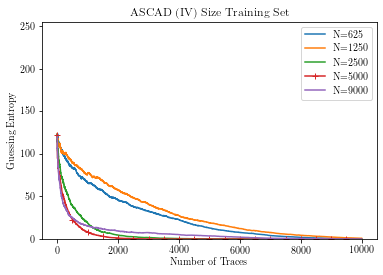

<Figure size 432x288 with 0 Axes>

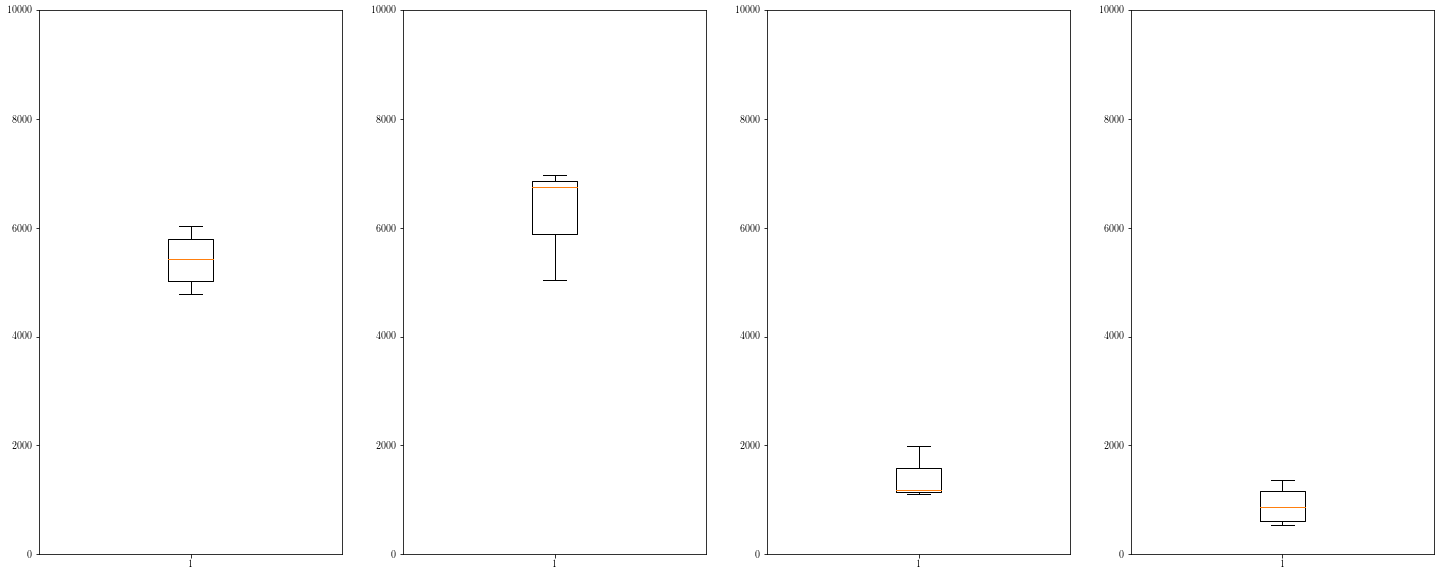

In [6]:
#training size variation
data_1 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T625']['res'],all_data['experiments\\20210203\\ascad_gcnn_IV_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210204\\ascad_gcnn_IV_T625']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210205\\ascad_gcnn_IV_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210205\\ascad_gcnn_IV_T625-2']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210208\\ascad_gcnn_IV_T625-1']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210208\\ascad_gcnn_IV_T625']['res'],axis=0)

data_2 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T1250']['res'],all_data['experiments\\20210203\\ascad_gcnn_IV_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210204\\ascad_gcnn_IV_T1250']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210205\\ascad_gcnn_IV_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210205\\ascad_gcnn_IV_T1250-2']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210208\\ascad_gcnn_IV_T1250-1']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210208\\ascad_gcnn_IV_T1250']['res'],axis=0)

data_3 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T2500']['res'],all_data['experiments\\20210203\\ascad_gcnn_IV_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210204\\ascad_gcnn_IV_T2500']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210205\\ascad_gcnn_IV_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210205\\ascad_gcnn_IV_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210208\\ascad_gcnn_IV_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210208\\ascad_gcnn_IV_T2500']['res'],axis=0)

data_4 = np.append(all_data['experiments\\20210203\\ascad_gcnn_IV_T5000']['res'], all_data['experiments\\20210203\\ascad_gcnn_IV_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210204\\ascad_gcnn_IV_T5000']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210205\\ascad_gcnn_IV_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210205\\ascad_gcnn_IV_T5000-2']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210208\\ascad_gcnn_IV_T5000-1']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210208\\ascad_gcnn_IV_T5000']['res'],axis=0)

(data1_conv,p_1) = utils.filter_traces(data_1,10)
(data2_conv,p_2) = utils.filter_traces(data_2,10)
(data3_conv,p_3) = utils.filter_traces(data_3,10)
(data4_conv,p_4) = utils.filter_traces(data_4,10)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD (IV) Size Training Set')

labels = ['N=625','N=1250','N=2500','N=5000','N=9000']
plt.plot(np.transpose(np.mean(data1_conv,axis=0)))
plt.plot(np.transpose(np.mean(data2_conv,axis=0)))
plt.plot(np.transpose(np.mean(data3_conv,axis=0)))
plt.plot(np.transpose(np.mean(data4_conv,axis=0)),marker='+',markevery=500)
plt.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
plt.legend(labels)

print(p_1)
print(p_2)
print(p_3)
print(p_4)

utils.get_traces_t_print(data1_conv,threshold=10)
utils.get_traces_t_print(data2_conv,threshold=10)
utils.get_traces_t_print(data3_conv,threshold=10)
utils.get_traces_t_print(data4_conv,threshold=10)
plt.savefig("ascad_IV_train_size_CV.pdf")

fig = plt.figure()
fig, axs = plt.subplots(1, 4,figsize=(25,10))
axs[0].set_ylim([0,10000])
axs[1].set_ylim([0,10000])
axs[2].set_ylim([0,10000])
axs[3].set_ylim([0,10000])

axs[0].boxplot(utils.get_traces_threshold(data1_conv,10,stats=False))
axs[1].boxplot(utils.get_traces_threshold(data2_conv,10,stats=False))
axs[2].boxplot(utils.get_traces_threshold(data3_conv,10,stats=False))
axs[3].boxplot(utils.get_traces_threshold(data4_conv,10,stats=False))


100.0
100.0
100.0
100.0
4125.3 & 352.05938419533715 &3777.0 & 4900.0
5473.6 & 658.5326415600065 &4726.0 & 6686.0
2494.2727272727275 & 430.193421806156 &1900.0 & 3308.0
2513.4545454545455 & 1595.0123603759519 &1182.0 & 7227.0


{'whiskers': [<matplotlib.lines.Line2D at 0x153730ac400>,
 'caps': [<matplotlib.lines.Line2D at 0x153730acac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x153730ac0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x153730ba1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x153730ba550>],
 'means': []}

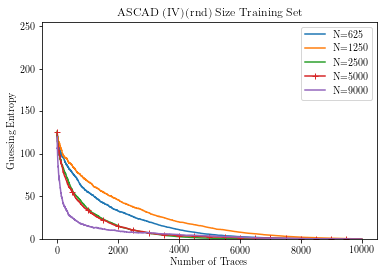

<Figure size 432x288 with 0 Axes>

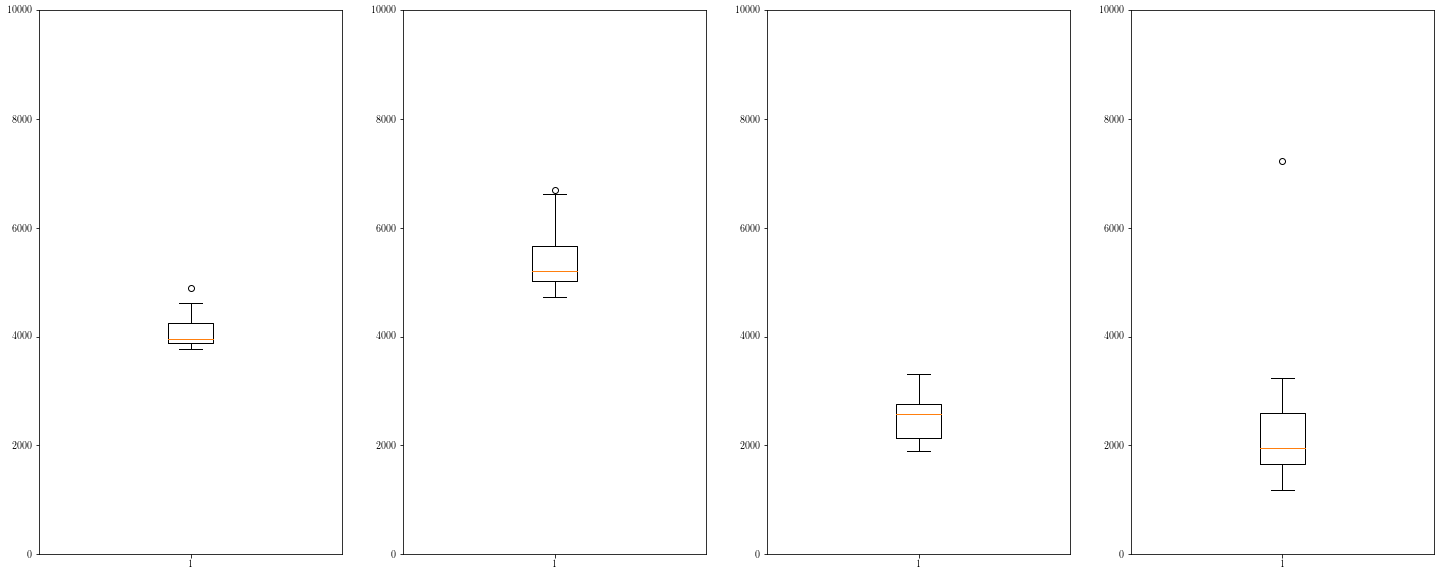

In [7]:
data_1 = np.append(all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-1']['res'],all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-2']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-3']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-4']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-5']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-6']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-7']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-8']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-9']['res'],axis=0)
data_1 = np.append(data_1,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T625-10']['res'],axis=0)

data_2 = np.append(all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-1']['res'],all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-2']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-3']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-4']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-5']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-6']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-7']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-8']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T1250-9']['res'],axis=0)
data_2 = np.append(data_2,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T1250-1']['res'],axis=0)

data_3 = np.append(all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-1']['res'],all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-3']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-5']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-6']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210217\\ascad_gcnn_IV_rnd_T2500-7']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-1']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-2']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-3']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-4']['res'],axis=0)
data_3 = np.append(data_3,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T2500-5']['res'],axis=0)

data_4 = np.append(all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-1']['res'], all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-2']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-3']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-4']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-5']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-6']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-7']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-8']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-9']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-10']['res'],axis=0)
data_4 = np.append(data_4,all_data['experiments\\20210218\\ascad_gcnn_IV_rnd_T5000-11']['res'],axis=0)


(data1_conv,p_1) = utils.filter_traces(data_1,10)
(data2_conv,p_2) = utils.filter_traces(data_2,10)
(data3_conv,p_3) = utils.filter_traces(data_3,10)
(data4_conv,p_4) = utils.filter_traces(data_4,10)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD (IV)(rnd) Size Training Set')

labels = ['N=625','N=1250','N=2500','N=5000','N=9000']
plt.plot(np.transpose(np.mean(data1_conv,axis=0)))
plt.plot(np.transpose(np.mean(data2_conv,axis=0)))
plt.plot(np.transpose(np.mean(data3_conv,axis=0)))
plt.plot(np.transpose(np.mean(data4_conv,axis=0)),marker='+',markevery=500)
plt.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
plt.legend(labels)

print(p_1)
print(p_2)
print(p_3)
print(p_4)

utils.get_traces_t_print(data1_conv,threshold=10)
utils.get_traces_t_print(data2_conv,threshold=10)
utils.get_traces_t_print(data3_conv,threshold=10)
utils.get_traces_t_print(data4_conv,threshold=10)
plt.savefig("ascad_IV_rnd_train_size_CV.pdf")

fig = plt.figure()
fig, axs = plt.subplots(1, 4,figsize=(25,10))
axs[0].set_ylim([0,10000])
axs[1].set_ylim([0,10000])
axs[2].set_ylim([0,10000])
axs[3].set_ylim([0,10000])

axs[0].boxplot(utils.get_traces_threshold(data1_conv,10,stats=False))
axs[1].boxplot(utils.get_traces_threshold(data2_conv,10,stats=False))
axs[2].boxplot(utils.get_traces_threshold(data3_conv,10,stats=False))
axs[3].boxplot(utils.get_traces_threshold(data4_conv,10,stats=False))

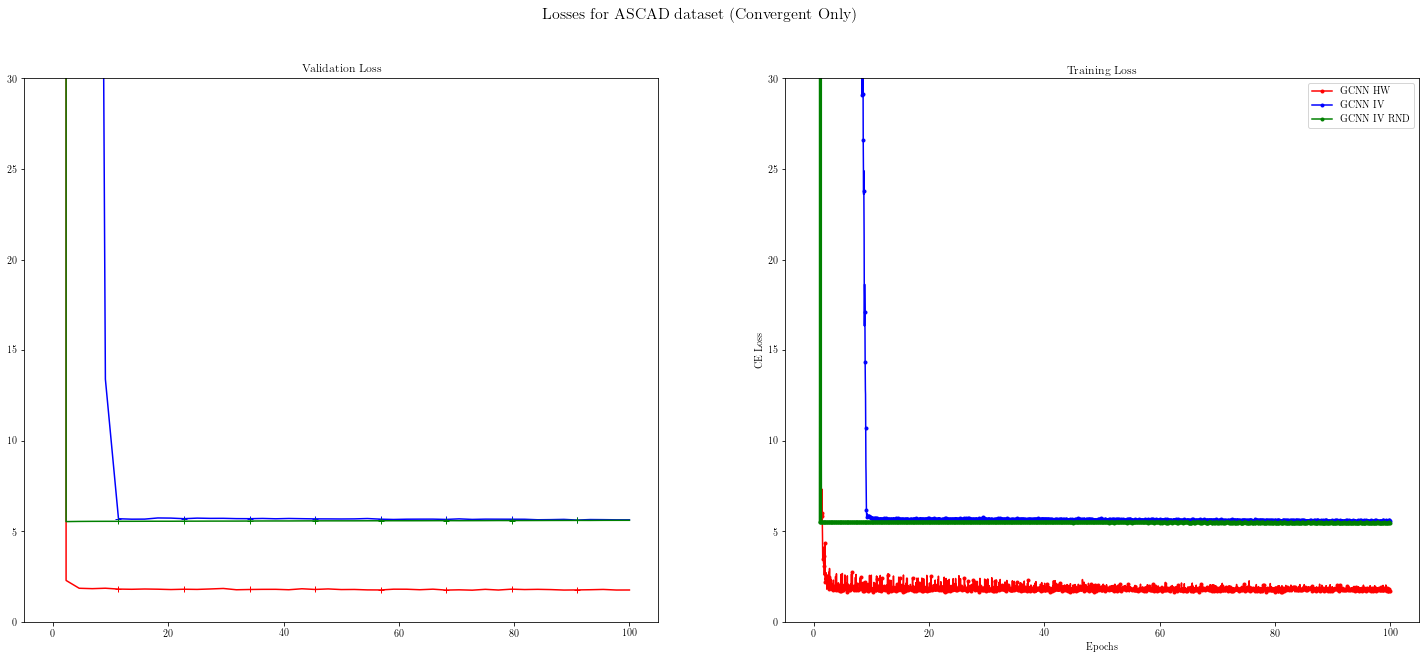

In [8]:
fig, axs = plt.subplots(1,2,figsize=(25,10))
axs[0].set_ylim([0,30])
axs[1].set_ylim([0,30])
axs[0].set_title('Validation Loss')
axs[1].set_title('Training Loss')
fig.suptitle('Losses for ASCAD dataset (Convergent Only)', fontsize=16)
plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')
plt.legend(labels)

if (not "ascad_gcat_td" in locals()) or( not "ascad_gcat_td" in globals()):
    ascad_gcat_td = utils.getTrainVarsForSetup('ascad_gcat')
    ascad_edgenet_td = utils.getTrainVarsForSetup('ascad_edgenet')
    ascad_gcnn_td = utils.getTrainVarsForSetup('ascad_gcnn\\')
    ascad_iv_rnd_td = utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd\\')
    ascad_iv_td = utils.getTrainVarsForSetup('ascad_gcnn_IV\\')


    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-1\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-2\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-3\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-4\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn-5\\'))

    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_1\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_2\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_3\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_4\\'))
    ascad_gcnn_td.update(utils.getTrainVarsForSetup('ascad_gcnn_5\\'))


    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV-5\\'))

    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_1\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_2\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_3\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_4\\'))
    ascad_iv_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd-5\\'))

    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_1\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_2\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_3\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_4\\'))
    ascad_iv_rnd_td.update(utils.getTrainVarsForSetup('ascad_gcnn_IV_rnd_5\\'))


ascad_gcat_valid, ascad_gcat_train = utils.showTrainLosses(ascad_gcat_td)
ascad_edgenet_valid, ascad_edgenet_train = utils.showTrainLosses(ascad_edgenet_td)
ascad_gcnn_valid, ascad_gcnn_train = utils.showTrainLosses(ascad_gcnn_td)
ascad_iv_rnd_valid,ascad_iv_rnd_train = utils.showTrainLosses(ascad_iv_rnd_td)
ascad_iv_valid,ascad_iv_train = utils.showTrainLosses(ascad_iv_td)

gcnn_conv_td = utils.filter_losses_mul('ascad_gcnn',10,data=all_data)
gcnn_iv_conv_td = utils.filter_losses_mul('ascad_gcnn_IV',10,data=all_data)
gcnn_iv_rnd_conv_td = utils.filter_losses_mul('ascad_gcnn_IV_rnd',10,data=all_data)

ascad_gcnn_conv_valid, ascad_gcnn_conv_train = utils.showTrainLosses(gcnn_conv_td)
ascad_gcnn_iv_conv_valid, ascad_gcnn_iv_conv_train = utils.showTrainLosses(gcnn_iv_conv_td)
ascad_gcnn_iv_rnd_conv_valid, ascad_gcnn_iv_rnd_conv_train = utils.showTrainLosses(gcnn_iv_rnd_conv_td)


xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,45)

idx = np.arange(0,4500,100)
ascad_gcnn_train = ascad_gcnn_train[:,idx]
ascad_gcat_train = ascad_gcat_train[:,idx]
ascad_edgenet_train = ascad_edgenet_train[:,idx]

#plt.yscale('log')
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_conv_valid,axis=0)),color='r',marker='+',markevery=5)
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_iv_conv_valid,axis=0)),color='b',marker='+',markevery=5)
axs[0].plot(xvals_valid,np.transpose(np.mean(ascad_gcnn_iv_rnd_conv_valid,axis=0)),color='g',marker='+',markevery=5)

axs[1].plot(xvals_train,np.transpose(np.mean(ascad_gcnn_conv_train,axis=0)),color='r',marker='.',markevery=5)
axs[1].plot(xvals_train,np.transpose(np.mean(ascad_gcnn_iv_conv_train,axis=0)),color='b',marker='.',markevery=5)
axs[1].plot(xvals_train,np.transpose(np.mean(ascad_gcnn_iv_rnd_conv_train,axis=0)),color='g',marker='.',markevery=5)

#plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_valid,axis=0)))
#plt.plot(xvals_valid,np.transpose(np.mean(ascad_iv_rnd_valid,axis=0)))
plt.legend(['GCNN HW','GCNN IV','GCNN IV RND'])
plt.savefig("ascad_losses_conv.pdf")


45.45454545454545
33.33333333333333
16.666666666666664
40.0
2569.4 & 3299.8915497331122 &509.0 & 9080.0
1168.25 & 1065.1080637663017 &458.0 & 3004.0
582.0 & 41.0 &541.0 & 623.0
552.25 & 71.66022257849887 &482.0 & 670.0


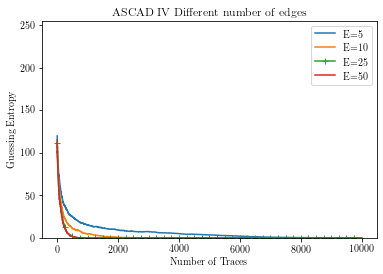

<Figure size 432x288 with 0 Axes>

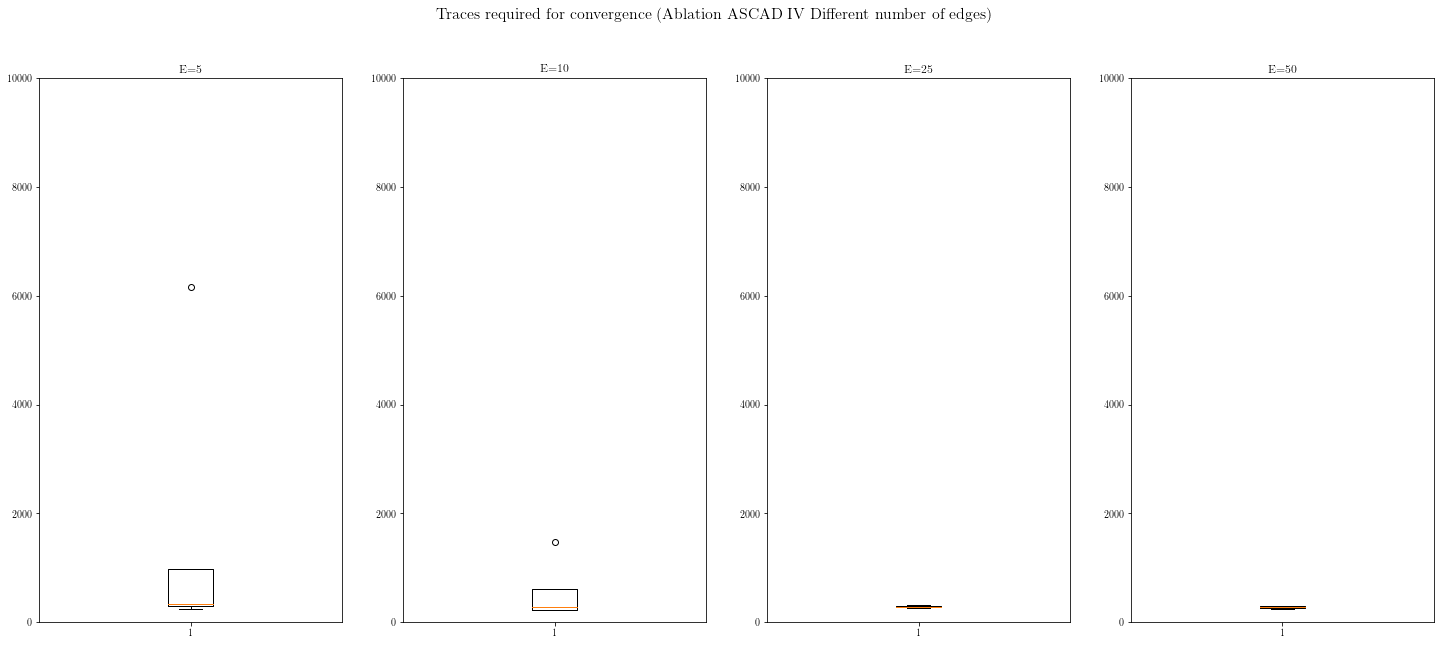

In [9]:
#Number Edges ASCAD
ascadn10 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N10-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-1']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-2']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-3']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-4']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-5']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-6']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-7']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-8']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-9']['res'],axis=0)
ascadn10 = np.append(ascadn10,all_data['experiments\\20210223\\ascad_gcnn_IV_N10-10']['res'],axis=0)

ascadn25 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N25-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-1']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-2']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-3']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-4']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-5']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-6']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-7']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-8']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-9']['res'],axis=0)
ascadn25 = np.append(ascadn25,all_data['experiments\\20210223\\ascad_gcnn_IV_N25-10']['res'],axis=0)

ascadn50 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N50-1']['res'],all_data['experiments\\20210223\\ascad_gcnn_IV_N50-1']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-2']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-3']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-4']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-5']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-6']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-7']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-8']['res'],axis=0)
ascadn50 = np.append(ascadn50,all_data['experiments\\20210223\\ascad_gcnn_IV_N50-9']['res'],axis=0)

ascadn100 = np.append(all_data['experiments\\20210222\\ascad_gcnn_IV_N100-1']['res'],all_data['experiments\\20210222\\ascad_gcnn_IV_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-5']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210222\\ascad_gcnn_IV_N100-6']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-1']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-2']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-3']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-4']['res'],axis=0)
ascadn100 = np.append(ascadn100,all_data['experiments\\20210224\\ascad_gcnn_IV_N100-5']['res'],axis=0)

(knn10_conv,p_n10) = utils.filter_traces(ascadn10,10)
(knn25_conv,p_n25) = utils.filter_traces(ascadn25,10)
(knn50_conv,p_n50) = utils.filter_traces(ascadn50,10)
(knn100_conv,p_n100) = utils.filter_traces(ascadn100,10)


fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,255])

plt.ylabel(r'Guessing Entropy')
plt.xlabel(r'Number of Traces')
plt.title('ASCAD IV Different number of edges')

labels = ['E=5','E=10','E=25','E=50','E=100']
plt.plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
plt.plot(np.transpose(np.mean(knn10_conv,axis=0)))
plt.plot(np.transpose(np.mean(knn25_conv,axis=0)),marker='+',markevery=250)
plt.plot(np.transpose(np.mean(knn50_conv,axis=0)))
plt.legend(labels)
plt.savefig("ascad_iv_nedges_conv.pdf")
print(p_IV)
print(p_n10)
print(p_n25)
print(p_n50)


utils.get_traces_t_print(gcnn_IV_conv,threshold=1)
utils.get_traces_t_print(knn10_conv,threshold=1)
utils.get_traces_t_print(knn25_conv,threshold=1)
utils.get_traces_t_print(knn50_conv,threshold=1)

fig = plt.figure()
fig, axs = plt.subplots(1, 4,figsize=(25,10))
axs[0].set_ylim([0,10000])
axs[1].set_ylim([0,10000])
axs[2].set_ylim([0,10000])
axs[3].set_ylim([0,10000])

fig.suptitle('Traces required for convergence (Ablation ASCAD IV Different number of edges)', fontsize=16)
axs[0].set_title('E=5')
axs[1].set_title('E=10')
axs[2].set_title('E=25')
axs[3].set_title('E=50')

axs[0].boxplot(utils.get_traces_threshold(gcnn_IV_conv,10,stats=False))
axs[1].boxplot(utils.get_traces_threshold(knn10_conv,10,stats=False))
axs[2].boxplot(utils.get_traces_threshold(knn25_conv,10,stats=False))
axs[3].boxplot(utils.get_traces_threshold(knn50_conv,10,stats=False))
plt.savefig("ascad_iv_nedges_conv_box.pdf")


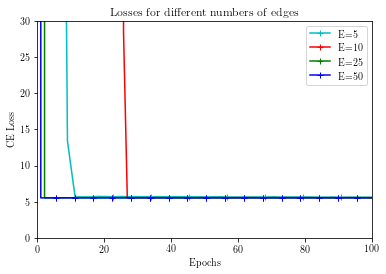

In [10]:
nn5_IV_td = utils.filter_losses_mul('ascad_gcnn_IV',10,data=all_data)
nn10_IV_td  = utils.filter_losses_mul('ascad_gcnn_IV_N10',10,data=all_data)
nn25_IV_td  = utils.filter_losses_mul('ascad_gcnn_IV_N25',10,data=all_data)
nn50_IV_td  = utils.filter_losses_mul('ascad_gcnn_IV_N50',10,data=all_data)

nn5_valid, nn5_train = utils.showTrainLosses(nn5_IV_td)
nn10_valid, nn10_train = utils.showTrainLosses(nn10_IV_td)
nn25_valid, nn25_train = utils.showTrainLosses(nn25_IV_td)
nn50_valid, nn50_train = utils.showTrainLosses(nn50_IV_td)

idx = np.arange(0,4500,100)

nn5_train = nn5_train[:,idx]
nn10_train = nn10_train[:,idx]
nn25_train = nn25_train[:,idx]
nn50_train = nn50_train[:,idx]

fig = plt.figure()
axes = plt.gca()
axes.set_ylim([0,30])
#plt.yscale('log')
axes.set_xlim([0,100])

xvals_train = np.linspace(0,100,4500)
xvals_valid = np.linspace(0,100,90)


plt.ylabel(r'CE Loss')
plt.xlabel(r'Epochs')
plt.plot(np.linspace(0,100,45),np.transpose(np.mean(nn5_valid,axis=0)),color='c',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn10_valid,axis=0)),color='r',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn25_valid,axis=0)),color='g',marker='+',markevery=5)
plt.plot(xvals_valid,np.transpose(np.mean(nn50_valid,axis=0)),color='b',marker='+',markevery=5)
labels = ['E=5','E=10','E=25','E=50','E=100']

plt.legend(labels)
plt.title('Losses for different numbers of edges')
plt.savefig("ascad_iv_nedges_losses_conv.pdf")

C:\Users\vasco\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\vasco\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


45.45454545454545
0.0
12.5
30.0
40.0
1599.0 & 2294.283068847434 &242.0 & 6157.0
10001.0 & 0.0 &10001.0 & 10001.0
289.0 & 0.0 &289.0 & 289.0
361.3333333333333 & 62.43040569750893 &300.0 & 447.0
1067.0 & 794.5888874128558 &284.0 & 2125.0


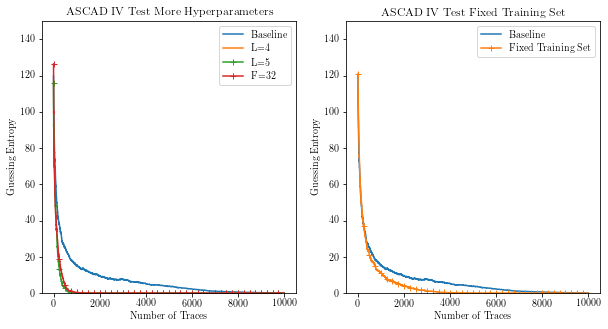

In [26]:
gcnn_iv_L = np.append(all_data['experiments\\20210303\\ascad_gcnn_IV_L-1']['res'],all_data['experiments\\20210303\\ascad_gcnn_IV_L-2']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-3']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-4']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-5']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-6']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-7']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-8']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-9']['res'], axis=0)
gcnn_iv_L = np.append(gcnn_iv_L,all_data['experiments\\20210303\\ascad_gcnn_IV_L-10']['res'], axis=0)

gcnn_iv_LL = np.append(all_data['experiments\\20210303\\ascad_gcnn_IV_LL-1']['res'],all_data['experiments\\20210303\\ascad_gcnn_IV_LL-2']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-3']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-4']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-5']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-8']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-9']['res'], axis=0)
gcnn_iv_LL = np.append(gcnn_iv_LL,all_data['experiments\\20210303\\ascad_gcnn_IV_LL-10']['res'], axis=0)

gcnn_iv_F = np.append(all_data['experiments\\20210305\\ascad_gcnn_IV_F-1']['res'],all_data['experiments\\20210305\\ascad_gcnn_IV_F-2']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-3']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-4']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-5']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-6']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-7']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-8']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-9']['res'], axis=0)
gcnn_iv_F = np.append(gcnn_iv_F,all_data['experiments\\20210305\\ascad_gcnn_IV_F-10']['res'], axis=0)

gcnn_iv_fixed = np.append(all_data['experiments\\20210309\\ascad_gcnn_IV_fix-1']['res'],all_data['experiments\\20210309\\ascad_gcnn_IV_fix-2']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-3']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-4']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-5']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-6']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-7']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-8']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-9']['res'], axis=0)
gcnn_iv_fixed = np.append(gcnn_iv_fixed,all_data['experiments\\20210309\\ascad_gcnn_IV_fix-10']['res'], axis=0)

(L_conv,p_L) = utils.filter_traces(gcnn_iv_L,10)
(LL_conv,p_LL) = utils.filter_traces(gcnn_iv_LL,10)
(F_conv,p_F) = utils.filter_traces(gcnn_iv_F,10)
(Fix_conv,p_Fix) = utils.filter_traces(gcnn_iv_fixed,10)

fig, axs = plt.subplots(1, 2,figsize=(10,5))
axs[0].set_ylim([0,150])
axs[1].set_ylim([0,150])

axs[0].set_ylabel(r'Guessing Entropy')
axs[1].set_ylabel(r'Guessing Entropy')

axs[0].set_xlabel(r'Number of Traces')
axs[1].set_xlabel(r'Number of Traces')


axs[0].set_title('ASCAD IV  Test More Hyperparameters')
axs[1].set_title('ASCAD IV Test Fixed Training Set')

labels = ['Baseline','L=4','L=5','F=32','Fixed Training Set']
axs[0].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
axs[0].plot(np.transpose(np.mean(L_conv,axis=0)))
axs[0].plot(np.transpose(np.mean(LL_conv,axis=0)),marker='+',markevery=250)
axs[0].plot(np.transpose(np.mean(F_conv,axis=0)),marker='+',markevery=250)

axs[1].plot(np.transpose(np.mean(gcnn_IV_conv,axis=0)))
axs[1].plot(np.transpose(np.mean(Fix_conv,axis=0)),marker='+',markevery=250)

axs[0].legend(labels)
axs[1].legend(['Baseline','Fixed Training Set'])

plt.savefig("ascad_iv_L_conv.pdf")
print(p_IV)
print(p_L)
print(p_LL)
print(p_F)
print(p_Fix)

utils.get_traces_t_print(gcnn_IV_conv,threshold=10)
utils.get_traces_t_print(gcnn_iv_L,threshold=10)
utils.get_traces_t_print(LL_conv,threshold=10)
utils.get_traces_t_print(F_conv,threshold=10)
utils.get_traces_t_print(Fix_conv,threshold=10)
